<a href="https://colab.research.google.com/github/Bahaakhalled/Delivery-Duration-Prediction-Stratas/blob/main/Delivery_Duration_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [443]:
dash=pd.read_csv('historical_data.csv')
dash.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [444]:
dash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [445]:
dash.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [446]:
dash.nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
store_primary_category                              74
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
dtype: int64

In [447]:
drop_dash=dash.copy()
import datetime as dt

In [448]:
drop_dash['created_at']=drop_dash['created_at'].astype('datetime64')
drop_dash['actual_delivery_time']=drop_dash['actual_delivery_time'].astype('datetime64')

In [449]:
drop_dash['created_at'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  197428
unique                 180985
top       2015-02-11 19:50:43
freq                        6
first     2014-10-19 05:24:15
last      2015-02-18 06:00:44
Name: created_at, dtype: object

In [450]:
dlv_time=drop_dash['actual_delivery_time']-drop_dash['created_at']
drop_dash['delivery_time']=dlv_time.dt.seconds

In [451]:
drop_dash['delivery_time'].mean()/60

47.705080259952084

Average Delivery Time for orders is ~47 Minutes

In [452]:
~drop_dash.isnull().sum()

market_id                                        -988
created_at                                         -1
actual_delivery_time                               -8
store_id                                           -1
store_primary_category                          -4761
order_protocol                                   -996
total_items                                        -1
subtotal                                           -1
num_distinct_items                                 -1
min_item_price                                     -1
max_item_price                                     -1
total_onshift_dashers                          -16263
total_busy_dashers                             -16263
total_outstanding_orders                       -16263
estimated_order_place_duration                     -1
estimated_store_to_consumer_driving_duration     -527
delivery_time                                      -8
dtype: int64

In [453]:
missing=(drop_dash.isnull().sum().sum()/np.product(drop_dash.shape) ) * 100
print('Data Missing: ',missing,'%')

Data Missing:  1.6705419935666792 %


In [454]:
print('{0} rows would be dropped if we delete rows with missing values out of {1} rows which is {2} % of the data'.format(drop_dash.shape[0] - drop_dash.dropna().shape[0],drop_dash.shape[0],(drop_dash.shape[0] - drop_dash.dropna().shape[0])/drop_dash.shape[0] * 100))

21651 rows would be dropped if we delete rows with missing values out of 197428 rows which is 10.96652957027372 % of the data


In [455]:
drop_dash=drop_dash.dropna(axis=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfc4eba750>,
      dtype=object)

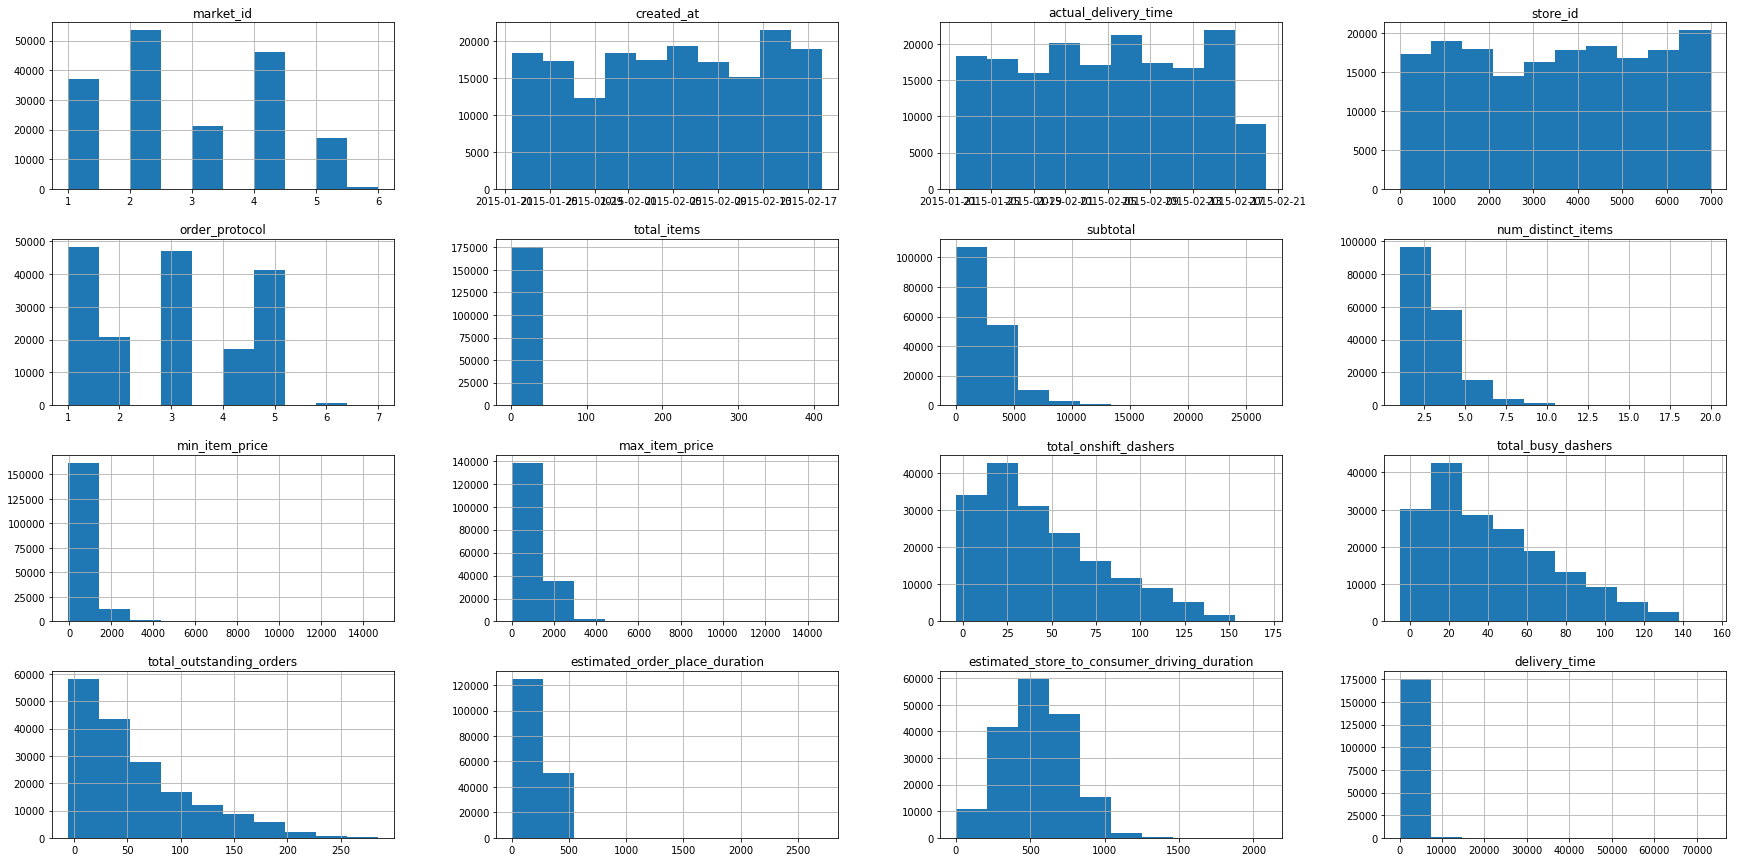

In [456]:
drop_dash.hist(figsize=(30,15))

**Histograms tell more on Column distribution,outlier existence and column value range**


---

We can obviously see outliers in various columns like total_items and min_item_price etc. which is better to check and perhaps remove to get better averaging and overview of the column and data


---

We can observe skewness in various columns aswell like total_busy_dashers and total_outstanding_orders etc.

In [457]:
drop_dash2=drop_dash.copy()

In [458]:
outlier_cols=['total_items','max_item_price','delivery_time','estimated_order_place_duration','min_item_price','num_distinct_items','estimated_store_to_consumer_driving_duration']
drop_dash2[outlier_cols].describe()

,total_items,max_item_price,delivery_time,estimated_order_place_duration,min_item_price,num_distinct_items,estimated_store_to_consumer_driving_duration
count,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000,175777.000000
mean,3.204976,1160.158616,2862.981949,307.818105,684.965433,2.675060,546.077240
std,2.674055,560.828571,1178.445769,89.796587,519.882924,1.625681,218.717798
min,1.000000,0.000000,101.000000,0.000000,-86.000000,1.000000,0.000000
25%,2.000000,799.000000,2105.000000,251.000000,299.000000,1.000000,384.000000
50%,3.000000,1095.000000,2662.000000,251.000000,595.000000,2.000000,544.000000
75%,4.000000,1395.000000,3383.000000,446.000000,942.000000,3.000000,703.000000
max,411.000000,14700.000000,73282.000000,2715.000000,14700.000000,20.000000,2088.000000


In [459]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers


def print_outliers(df):
  outliers = find_outliers_IQR(df)
  print(df.name)
  print('number of outliers: '+ str(len(outliers)))
  print('max outlier value: '+ str(outliers.max()))
  print('min outlier value: '+ str(outliers.min()) + '\n')
  print(df.shape)

def delete_outliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  outliers_dropped = not_outliers.dropna().reset_index()
  return outliers_dropped

In [460]:
drop_dash2.select_dtypes(exclude=object).apply(print_outliers)

market_id
number of outliers: 0
max outlier value: nan
min outlier value: nan

(175777,)
created_at
number of outliers: 0
max outlier value: NaT
min outlier value: NaT

(175777,)
actual_delivery_time
number of outliers: 0
max outlier value: NaT
min outlier value: NaT

(175777,)
store_id
number of outliers: 0
max outlier value: nan
min outlier value: nan

(175777,)
order_protocol
number of outliers: 0
max outlier value: nan
min outlier value: nan

(175777,)
total_items
number of outliers: 8486
max outlier value: 411
min outlier value: 8

(175777,)
subtotal
number of outliers: 8050
max outlier value: 26800
min outlier value: 6408

(175777,)
num_distinct_items
number of outliers: 5249
max outlier value: 20
min outlier value: 7

(175777,)
min_item_price
number of outliers: 4047
max outlier value: 14700
min outlier value: 1909

(175777,)
max_item_price
number of outliers: 6954
max outlier value: 14700
min outlier value: 2290

(175777,)
total_onshift_dashers
number of outliers: 1208
max outl

market_id                                       None
created_at                                      None
actual_delivery_time                            None
store_id                                        None
order_protocol                                  None
total_items                                     None
subtotal                                        None
num_distinct_items                              None
min_item_price                                  None
max_item_price                                  None
total_onshift_dashers                           None
total_busy_dashers                              None
total_outstanding_orders                        None
estimated_order_place_duration                  None
estimated_store_to_consumer_driving_duration    None
delivery_time                                   None
dtype: object

In [461]:
drop_dash2.select_dtypes(exclude=[object,'datetime']).columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'delivery_time'],
      dtype='object')

As a start i'll be removing outliers according to the interquantile range

In [462]:
#drop_dash2.select_dtypes(exclude=[object,'datetime']).apply(delete_outliers)